# Projeto Final
## Base de dados **Hotel Reservations**
- https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

#### Submissão: [Google-Forms](https://forms.gle/kKjVGvuboHb4LD4S9)
#### Prazo de envio: **09/12/2024**

## Exercício 1: Utilizando a função apply
Crie uma nova coluna chamada `stay_duration` a partir da soma de `no_of_weekend_nights` e `no_of_week_nights`.

In [ ]:
import pandas as pd

hotel_data = pd.read_csv('Hotel-Reservations.csv')

# Criar a nova coluna 'stay_duration' somando 'no_of_weekend_nights' e 'no_of_week_nights'
hotel_data['stay_duration'] = hotel_data['no_of_weekend_nights'] + hotel_data['no_of_week_nights']

# Exibir as primeiras linhas para verificar o resultado
hotel_data[['no_of_weekend_nights', 'no_of_week_nights', 'stay_duration']].head()

,no_of_weekend_nights,no_of_week_nights,stay_duration
0,1,2,3
1,2,3,5
2,2,1,3
3,0,2,2
4,1,1,2


## Exercício 2: Utilizando a função transform
- Aplique a normalização (escalonamento entre 0 e 1) Min-Max na coluna `avg_price_per_room`.
- **Normalização Min-Max**:
$
x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$

### Onde:
- \( $x$ \): Valor original.
- \( $x'$ \): Valor normalizado (entre 0 e 1).
- \( $x_{\text{min}}$ \): Valor mínimo do conjunto de dados.
- \( $x_{\text{max}}$ \): Valor máximo do conjunto de dados.



In [5]:
import pandas as pd

hotel_data = pd.read_csv('Hotel-Reservations.csv')

# Aplicando a normalização Min-Max na coluna 'avg_price_per_room'
min_val = hotel_data['avg_price_per_room'].min()
max_val = hotel_data['avg_price_per_room'].max()

# Criando a coluna normalizada
hotel_data['avg_price_per_room_normalized'] = (hotel_data['avg_price_per_room'] - min_val) / (max_val - min_val)

# Exibindo algumas linhas para visualizar a nova coluna
print(hotel_data[['avg_price_per_room', 'avg_price_per_room_normalized']])

       avg_price_per_room  avg_price_per_room_normalized
0                   65.00                       0.120370
1                  106.68                       0.197556
2                   60.00                       0.111111
3                  100.00                       0.185185
4                   94.50                       0.175000
...                   ...                            ...
36270              167.80                       0.310741
36271               90.95                       0.168426
36272               98.39                       0.182204
36273               94.50                       0.175000
36274              161.67                       0.299389

[36275 rows x 2 columns]


## Exercício 3: Substituições com replace e regex
Altere a coluna `room_type_reserved` extraindo apenas os números da coluna.

In [6]:
import pandas as pd

hotel_data = pd.read_csv('Hotel-Reservations.csv')

# Extraindo apenas os números da coluna 'room_type_reserved' usando regex
hotel_data['room_type_reserved_numbers'] = hotel_data['room_type_reserved'].str.extract(r'(\d+)')

# Exibindo as primeiras linhas do resultado
hotel_data[['room_type_reserved', 'room_type_reserved_numbers']].head()


,room_type_reserved,room_type_reserved_numbers
0,Room_Type 1,1
1,Room_Type 1,1
2,Room_Type 1,1
3,Room_Type 1,1
4,Room_Type 1,1


## Exercício 4: Gráfico Mapa de Calor
Faça a plotagem do Mapa de calor (**Heatmap**) entre as colunas numéricas

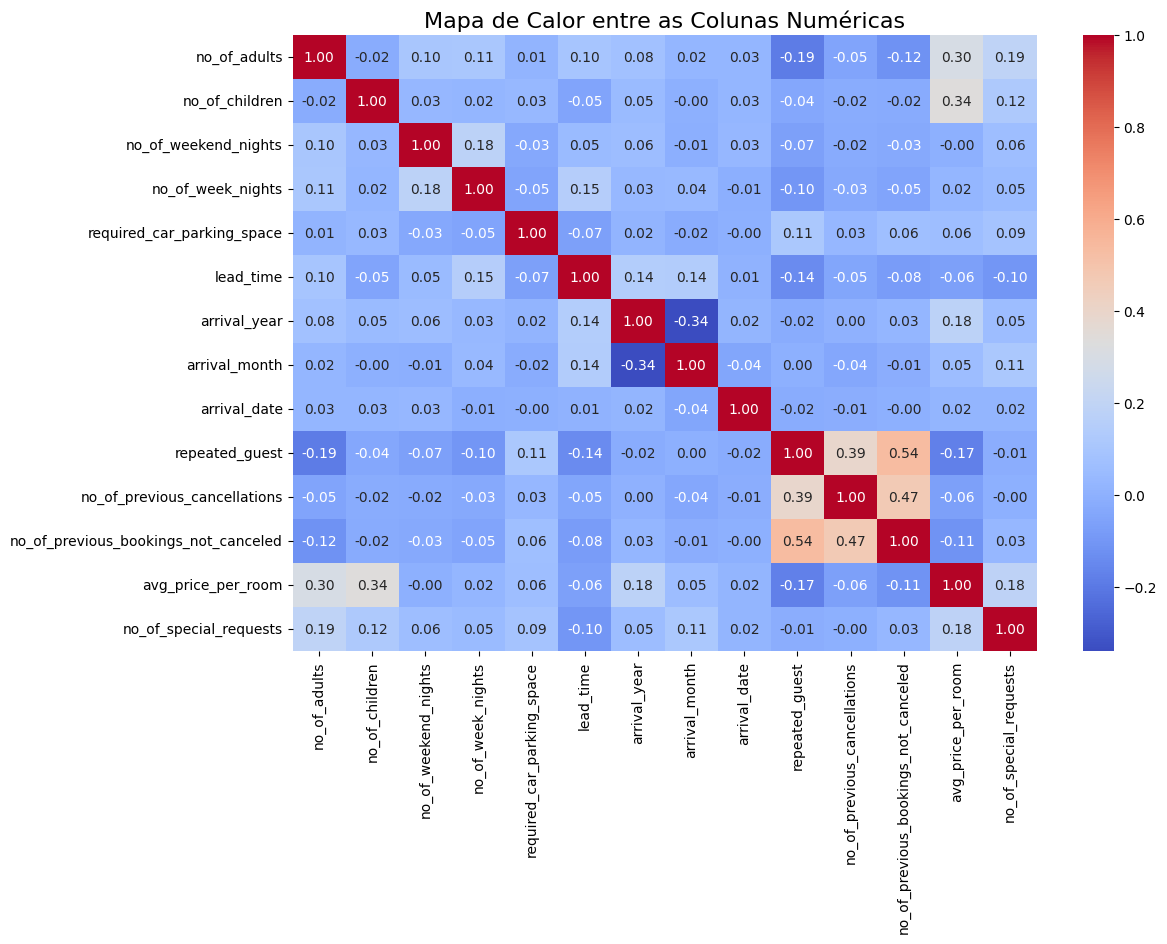

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

hotel_data = pd.read_csv('Hotel-Reservations.csv')

# Selecionando apenas colunas numéricas
numeric_data = hotel_data.select_dtypes(include=['float64', 'int64'])

# Configurando o tamanho do gráfico
plt.figure(figsize=(12, 8))

# Criando o mapa de calor
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")

# Título do gráfico
plt.title("Mapa de Calor entre as Colunas Numéricas", fontsize=16)
plt.show()

## Exercício 5: Expressões Regulares
Altere a coluna `Booking_ID`, extraindo apenas os números da coluna.

In [ ]:
import pandas as pd

hotel_data = pd.read_csv('Hotel-Reservations.csv')

# Extrair os números da coluna 'Booking_ID' usando regex
hotel_data['Booking_ID_Num'] = hotel_data['Booking_ID'].str.extract(r'(\d+)', expand=False)

# Exibir os resultados atualizados
print(hotel_data[['Booking_ID', 'Booking_ID_Num']].head())

  Booking_ID Booking_ID_Num
0   INN00001          00001
1   INN00002          00002
2   INN00003          00003
3   INN00004          00004
4   INN00005          00005


## Exercício 6: Gráfico de Dispersão
Faça a plotagem com a relação entre `lead_time` e `avg_price_per_room` (sem a normalização).

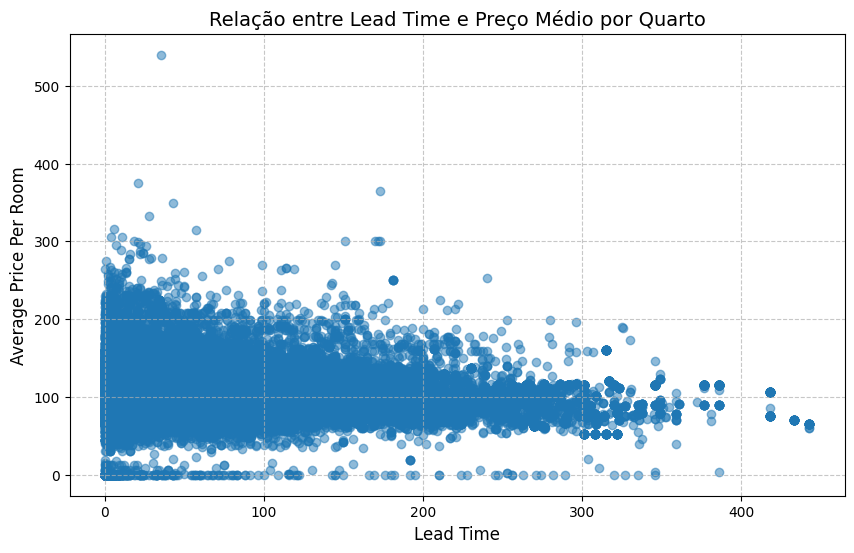

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

hotel_data = pd.read_csv('Hotel-Reservations.csv')

# Plotando o gráfico de dispersão entre lead_time e avg_price_per_room
plt.figure(figsize=(10, 6))
plt.scatter(hotel_data['lead_time'], hotel_data['avg_price_per_room'], alpha=0.5)
plt.title('Relação entre Lead Time e Preço Médio por Quarto', fontsize=14)
plt.xlabel('Lead Time', fontsize=12)
plt.ylabel('Average Price Per Room', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Exercício 7: Groupby e Agg
Calcule o preço médio (`avg_price_per_room`), sem normalização, por tipo de quarto (`room_type_reserved`).

In [6]:
import pandas as pd

hotel_data = pd.read_csv('Hotel-Reservations.csv')

# Agrupando por 'room_type_reserved' e calculando o preço médio de 'avg_price_per_room'
room_price_summary = hotel_data.groupby('room_type_reserved')['avg_price_per_room'].mean().reset_index()

# Renomeando as colunas para clareza
room_price_summary.columns = ['Room Type Reserved', 'Average Price Per Room']

room_price_summary.head()

,Room Type Reserved,Average Price Per Room
0,Room_Type 1,95.918532
1,Room_Type 2,87.848555
2,Room_Type 3,73.678571
3,Room_Type 4,125.287317
4,Room_Type 5,123.733623


## Exercício 8: Boxplot
Apresente o boxplot com os dados de preço médio (`avg_price_per_room`), sem normalização, por tipo de quarto (`room_type_reserved`).

<Figure size 1000x600 with 0 Axes>

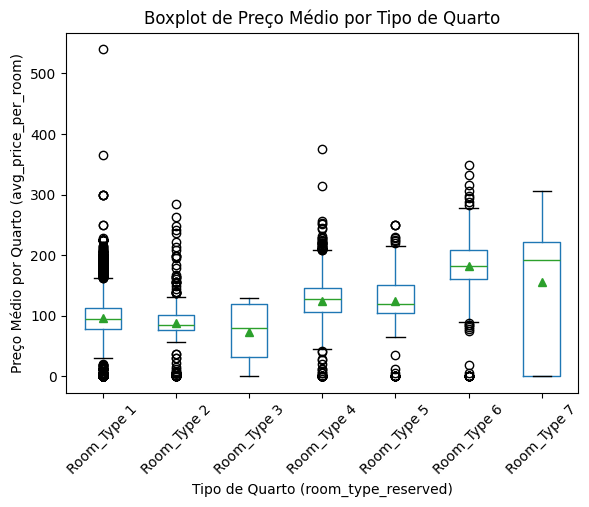

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

hotel_data = pd.read_csv('Hotel-Reservations.csv')
# Criar o boxplot para avg_price_per_room por room_type_reserved
plt.figure(figsize=(10, 6))
hotel_data.boxplot(column='avg_price_per_room', by='room_type_reserved', grid=False, showmeans=True)

# Personalização do gráfico
plt.title('Boxplot de Preço Médio por Tipo de Quarto')
plt.suptitle('')
plt.xlabel('Tipo de Quarto (room_type_reserved)')
plt.ylabel('Preço Médio por Quarto (avg_price_per_room)')
plt.xticks(rotation=45)
plt.show()